In [249]:
# Import Modules
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib inline  
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
import urllib.request
import os
import seaborn as sns
#from regressors import stats 
from statsmodels.stats.outliers_influence import variance_inflation_factor
import urllib.request
import os
import sys
import logging
import traceback
import argparse
import datetime
import json
import coinmetrics
from datetime import timedelta, date
from pytrends.request import TrendReq
import time
pd.__version__



'1.1.3'

In [250]:
##Google Trends Data for the search term "bitcoin"
# If you would like to add additional queries, simply add them to the dataframe
# You must manually adjust the date in the line timeframe ='___',
startTime = time.time()
pytrend = TrendReq(hl='en-GB', tz=360)
colnames = ["keywords"]
df = pd.DataFrame()
df['keywords'] = ['bitcoin']
df2 = df["keywords"].values.tolist()

dataset = []

#first halving period, do not edit
for x in range(0,len(df2)):
     keywords = [df2[x]]
     pytrend.build_payload(
     kw_list=keywords,
     cat=0,
     timeframe='2010-11-6 2012-11-28',
     geo='')
     data = pytrend.interest_over_time()
     if not data.empty:
          data = data.drop(labels=['isPartial'],axis='columns')
          dataset.append(data)

result = pd.concat(dataset, axis=1)
result.to_csv('h1.csv')

#second halving period, do not edit
for x in range(0,len(df2)):
     keywords = [df2[x]]
     pytrend.build_payload(
     kw_list=keywords,
     cat=0,
     timeframe='2012-11-28 2016-7-9',
     geo='')
     data = pytrend.interest_over_time()
     if not data.empty:
          data = data.drop(labels=['isPartial'],axis='columns')
          dataset.append(data)

result = pd.concat(dataset, axis=1)
result.to_csv('h2.csv')

#third halving period, do not edit
for x in range(0,len(df2)):
     keywords = [df2[x]]
     pytrend.build_payload(
     kw_list=keywords,
     cat=0,
     timeframe='2016-7-9 2020-5-11',
     geo='')
     data = pytrend.interest_over_time()
     if not data.empty:
          data = data.drop(labels=['isPartial'],axis='columns')
          dataset.append(data)

result = pd.concat(dataset, axis=1)
result.to_csv('h3.csv')

#current period, EDIT SECOND DATE TO REFLECT CURRENT DATE
for x in range(0,len(df2)):
    keywords = [df2[x]]
    pytrend.build_payload(
    kw_list=keywords,
    cat=0,
    timeframe='2020-5-11 2021-01-24',
    geo='')
    data = pytrend.interest_over_time()
    if not data.empty:
        data = data.drop(labels=['isPartial'],axis='columns')
        inbetween = pd.DataFrame(data)
        inbetween = inbetween.resample('W').mean()
        dataset.append(inbetween)

result = pd.concat(dataset)
result.to_csv('h4.csv')
result.tail(10)

,bitcoin
date,
2020-11-22,24.285714
2020-11-29,25.571429
2020-12-06,21.571429
2020-12-13,17.142857
2020-12-20,30.000000
2020-12-27,32.000000
2021-01-03,47.571429
2021-01-10,69.285714
2021-01-17,64.714286


In [251]:
##CoinMetrics API data
# Initialize a reference object, in this case `cm` for the Community API
cm = coinmetrics.Community()


# List all available metrics for BTC.
asset = "btc"
available_data_types = cm.get_available_data_types_for_asset(asset)
#print("available data types:\n", available_data_types)

# Fetch the data
metrics = "SplyCur,IssContNtv,CapMrktCurUSD,PriceUSD,DiffMean"
begin_timestamp = "2010-11-06"  # The `datetime` type is also accepted
end_timestamp = "2021-01-24"  # The `datetime` type is also accepted
asset_data = cm.get_asset_data_for_time_range(asset, metrics, begin_timestamp, end_timestamp)

CM_raw_data = coinmetrics.cm_to_pandas(asset_data)
pathname = "CM_raw_data.csv"
coinmetrics.csv(CM_raw_data, pathname)
CM_raw_data.tail(10)

,SplyCur,IssContNtv,CapMrktCurUSD,PriceUSD,DiffMean
2021-01-15T00:00:00.000Z,1.860139e+07,968.75,6.828629e+11,36710.317425,2.060742e+13
2021-01-16T00:00:00.000Z,1.860231e+07,918.75,6.729806e+11,36177.261097,2.060742e+13
2021-01-17T00:00:00.000Z,1.860314e+07,831.25,6.710141e+11,36069.939467,2.060742e+13
2021-01-18T00:00:00.000Z,1.860405e+07,906.25,6.808020e+11,36594.296402,2.060742e+13
2021-01-19T00:00:00.000Z,1.860498e+07,931.25,6.744332e+11,36250.146189,2.060742e+13
2021-01-20T00:00:00.000Z,1.860586e+07,881.25,6.607960e+11,35515.480013,2.060742e+13
2021-01-21T00:00:00.000Z,1.860667e+07,806.25,5.772337e+11,31022.951028,2.060742e+13
2021-01-22T00:00:00.000Z,1.860755e+07,881.25,6.137966e+11,32986.435757,2.060742e+13
2021-01-23T00:00:00.000Z,1.860852e+07,975.00,5.961478e+11,32036.282272,2.074318e+13
2021-01-24T00:00:00.000Z,1.860939e+07,868.75,5.995221e+11,32216.104290,2.082353e+13


In [253]:
mydates = pd.date_range(begin_timestamp, end_timestamp).tolist()
CoinMetrics = pd.DataFrame()
CoinMetrics = pd.read_csv("CM_raw_data.csv")
Google = pd.read_csv("h4.csv" , index_col='date',parse_dates=['date'])

#uses estimate of inflation value by taking the actualy daily issuance multiplied by 365

#create variables
SplyCur = CoinMetrics[['SplyCur']]
IssContNtv = CoinMetrics[['IssContNtv']]
#S2F = np.divide(SplyCur,fwd_issuance)
MktCap = CoinMetrics[['CapMrktCurUSD']]
DiffMean = CoinMetrics[['DiffMean']]
lnMC = np.log(MktCap)
lnDiff = np.log(DiffMean)
Trend = Google[['bitcoin']]

#populate dataframe
CMCleaned = pd.DataFrame()
CMCleaned['date'] = mydates
CMCleaned['tsupply'] = SplyCur
CMCleaned['lnMC'] = lnMC
CMCleaned['lndiff'] = lnDiff
CMCleaned['issuance'] = IssContNtv
CMCleaned.to_csv('CMCleaned.csv', encoding='utf-8')
CMCleaned = pd.read_csv("CMCleaned.csv", index_col='date',parse_dates=['date'])
CMCleaned['issuance_avg'] = CMCleaned.issuance.resample('W').mean()
CMCleaned['fwd_issuance'] = np.multiply(CMCleaned[['issuance_avg']],365)
CMCleaned['s2f'] = np.divide(CMCleaned[['tsupply']],CMCleaned[['fwd_issuance']])
CMCleaned['lns2f'] = np.log(CMCleaned[['s2f']])
CMCleaned['trend'] = Trend
CMCleaned = CMCleaned.resample('W').mean()

CMCleaned.to_csv('CMCleaned.csv', encoding='utf-8')
CMCleaned.tail(10)

,Unnamed: 0,tsupply,lnMC,lndiff,issuance,issuance_avg,fwd_issuance,s2f,lns2f,trend
date,,,,,,,,,,
2020-11-22,3666.0,1.854824e+07,26.532576,30.494362,1012.500000,1012.500000,369562.500000,50.198113,3.915977,24.285714
2020-11-29,3673.0,1.855504e+07,26.536924,30.503636,933.928571,933.928571,340883.928571,54.440459,3.997108,25.571429
2020-12-06,3680.0,1.856131e+07,26.598930,30.583697,872.321429,872.321429,318397.321429,58.304460,4.065679,21.571429
2020-12-13,3687.0,1.856752e+07,26.569325,30.583488,883.035714,883.035714,322308.035714,57.616203,4.053804,17.142857
2020-12-20,3694.0,1.857376e+07,26.728241,30.557948,913.392857,913.392857,333388.392857,55.720473,4.020348,30.000000
2020-12-27,3701.0,1.858008e+07,26.841300,30.557934,882.142857,882.142857,321982.142857,57.713554,4.055492,32.000000
2021-01-03,3708.0,1.858672e+07,27.029046,30.554161,989.285714,989.285714,361089.285714,51.482167,3.941235,47.571429
2021-01-10,3715.0,1.859376e+07,27.261661,30.575099,1000.892857,1000.892857,365325.892857,50.904317,3.929948,69.285714
2021-01-17,3722.0,1.860042e+07,27.238088,30.656672,925.000000,925.000000,337625.000000,55.100008,4.009150,64.714286


In [254]:
# Load all of the data
##resample usage(last = closing, mean = average, first = open)
##read the stata csv with proper S2F variable selection and index


S2F = pd.read_csv("CMCleaned.csv", index_col='date',parse_dates=['date'])
OOS = pd.DataFrame()


OOS = S2F
S2F = S2F[S2F.index > '2010-11-6']
S2F = S2F[S2F.index <= '2020-12-27']
S2F.fillna(method='ffill',inplace=True)
OOS = OOS[OOS.index > '2020-12-27']
OOS = OOS[OOS.index <= '2021-1-24']
OOS.fillna(method='ffill',inplace=True)

df = pd.DataFrame()
df = S2F.resample('W').mean()
df = df.drop('issuance_avg', axis=1)
df = df.drop('issuance', axis=1)
df = df.drop('fwd_issuance', axis=1)
df = df.drop('s2f', axis=1)
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df.to_csv('Weekly Average Data.csv', encoding='utf-8')
OOS.to_csv('OOS.csv', encoding='utf-8')


# Create arrays for features (X) and target variable (y)
y = df[['lnMC']]
X = df[['lns2f','lndiff','trend']]
vif = pd.DataFrame()
#vif["variables"] = X.columns
#vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [255]:
# Show the first 5 observations
df.tail(10)
#OOS.head(10)
#stata.tail(5)

,tsupply,lnMC,lndiff,lns2f,trend
date,,,,,
2020-10-25,1.852417e+07,26.180009,30.626620,4.106537,14.428571
2020-11-01,1.852933e+07,26.246938,30.626620,4.307229,14.714286
2020-11-08,1.853483e+07,26.333336,30.484632,4.063231,15.857143
2020-11-15,1.854150e+07,26.407300,30.451672,3.973688,16.142857
2020-11-22,1.854824e+07,26.532576,30.494362,3.915977,24.285714
2020-11-29,1.855504e+07,26.536924,30.503636,3.997108,25.571429
2020-12-06,1.856131e+07,26.598930,30.583697,4.065679,21.571429
2020-12-13,1.856752e+07,26.569325,30.583488,4.053804,17.142857
2020-12-20,1.857376e+07,26.728241,30.557948,4.020348,30.000000


# Linear Regression

In [256]:
# Create training and test sets with 0.3 test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Create linear regression object call ols
ols = LinearRegression()

# Train the model using the training sets
ols.fit(X_train, y_train)

# Report the coefficient 
ols.coef_

#X_test.head(5)

array([[1.3797276 , 0.29300673, 0.03739418]])

## Get the 5 fold CV score

In [257]:
#ols
ols_scores = cross_val_score(ols, X_train, y_train, cv = 5, scoring = 'neg_mean_squared_error')
print("Cross-validated OLS scores:", (-1)*ols_scores)

Cross-validated OLS scores: [0.37308614 0.30150203 0.3706947  0.26540397 0.31488389]


## Predict on the Test data

In [258]:
# Get the predicted y_pred using the test data
y_pred = ols.predict(X_test)
# Compute and print the R^2 and RMSE
print("R^2: {}".format(ols.score(X_test, y_test)))
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: {}".format(mse))
vif.head()

R^2: 0.9664584703932495
Mean Squared Error: 0.3325488048170725


""


## Construct the Predictor Space

In [259]:
#xmin = int(X_test.min())
#xmax = int(X_test.max())

xmin1 = X_test.lns2f.min()
xmax1 = X_test.lns2f.max()

#print(xmin1)

xmin2 = X_test.lndiff.min()
xmax2 = X_test.lndiff.max()

xmin3 = int(X_test.trend.min())
xmax3 = int(X_test.trend.max())


#print(xmin3)

predictor_space1 = pd.DataFrame(np.arange(xmin1,xmax1,.05))
predictor_space2 = pd.DataFrame(np.arange(xmin2,xmax2,.05))
predictor_space3 = pd.DataFrame(np.arange(xmin3,xmax3,.05))


PS2 = pd.DataFrame(predictor_space1, columns = ['lns2f', 'lndiff','trend'])
PS2['lns2f'] = predictor_space1
PS2['lndiff'] = predictor_space2
PS2['trend'] = predictor_space3



#plt.plot(PS2, ols.predict(PS2), color='blue', linewidth=3)
#plt.plot(predictor_space1, ols.predict(PS2), color='blue', linewidth=3)
# Scatter plot the actual test data
#plt.scatter(X_test.iloc[ : ,[1]], y_test,  color='black')

# Polynomial Regression

In [260]:
# Reload the CSV file into a DataFrame: df
df = pd.read_csv("Weekly Average Data.csv")

# Create arrays for features (Lighted) and target variable (Temp)
yp = df[['lnMC']]
Xp = df[['lns2f','lndiff','trend']]


# Add in 3-degree polynomial of the X variables
poly = PolynomialFeatures(degree = 3)
Xp = pd.DataFrame(poly.fit_transform(Xp))
print("Dimensions of X after reshaping: {}".format(Xp.shape))

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(Xp, yp, test_size = 0.3)

# Create linear regression object, ols2
ols2 = LinearRegression()

# Fit the model using the training sets 
# Train the model using the training sets
ols2.fit(X_train, y_train)

# Report the coefficients
ols2.coef_

Dimensions of X after reshaping: (530, 20)


array([[ 0.00000000e+00, -1.04699669e+01,  4.23218052e+00,
        -1.61787988e-01, -3.81726344e-01,  1.36857562e+00,
        -4.69581644e-03, -2.75762452e-01,  2.77104078e-02,
        -1.90176934e-03, -1.15733712e+00,  3.89443547e-01,
         1.85085053e-02, -7.52169539e-02, -1.17788728e-03,
        -5.24610874e-04,  7.15142222e-03, -7.36976115e-04,
         7.74112741e-05,  6.61067616e-06]])

## Get 5 fold score

In [261]:
#ols2
ols_scores2 = cross_val_score(ols, X_train, y_train, cv = 5, scoring = 'neg_mean_squared_error')
print("Cross-validated Polynomial Regression scores:", (-1)*ols_scores2)


Cross-validated Polynomial Regression scores: [0.14091248 0.16439978 0.17511251 0.20155607 0.2025613 ]


# Ridge Regression

In [262]:
# Create arrays for features (Lighted) and target variable (Temp)
yr = df[['lnMC']]
Xr = df[['lns2f','lndiff','trend']]

# Add in 3-degree polynomial of the X variables
Xr = pd.DataFrame(PolynomialFeatures(degree = 3).fit_transform(Xr))
  
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(Xr, yr, test_size = 0.25)

# Create a ridge regressor object called ridge
ridge = Ridge(normalize = True, alpha = 0.01)

# Train the ridge model using the training sets (the polynomial factors are in the data)
ridge.fit(X_train, y_train)

# The coefficients
ridge.coef_

array([[ 0.00000000e+00,  1.77656257e+00,  1.02706415e-01,
         5.15861549e-02,  6.04843245e-02,  1.50473822e-02,
         1.23434133e-02,  1.07286728e-03,  6.53783956e-04,
        -1.81007137e-04, -4.45814983e-02, -1.05752948e-03,
        -1.09307659e-03,  2.38637407e-04, -1.14427149e-04,
        -5.28554153e-05,  3.98256845e-05, -2.93375046e-05,
        -6.71599319e-07, -7.78700306e-07]])

## Get 5 fold Score

In [263]:
#ridge
ridge_scores = cross_val_score(ridge, X_train, y_train, cv=5, scoring = 'neg_mean_squared_error')
print("Cross-validated Polynomial Regression scores:", (-1)*ridge_scores)


Cross-validated Polynomial Regression scores: [0.24697546 0.27818076 0.26949995 0.18171273 0.26118377]


## Predict on the Test data

In [264]:
# Predict on the test data: y_pred
y_predicted = ridge.predict(X_test)

# Compute and print final R^2 and RMSE
print("R^2: {}".format(ridge.score(X_test, y_test)))
mse = mean_squared_error(y_test, y_predicted)
print("Mean Squared Error: {}".format(mse))


R^2: 0.9735899522063266
Mean Squared Error: 0.24676136089872744


# Get the 5 fold CV Scores (MSE) for OLS and Ridge models in one place on full data

In [265]:
# For different scores see: https://scikit-learn.org/stable/modules/model_evaluation.html
# for example, you could use 'r2' as well
#ols
ols_scores = cross_val_score(ols, X, y, cv = 5, scoring = 'neg_mean_squared_error')
print("Cross-validated OLS scores:", (-1)*ols_scores)

#ols2
#ols2_scores = cross_val_score(ols2, X, y, cv=5, scoring = 'neg_mean_squared_error')
#print("Cross-validated Polynomial Regression scores:", (-1)*ols_scores2)

# ridge
ridge_scores = cross_val_score(ridge, X, y, cv=5, scoring = 'neg_mean_squared_error')
print("Cross-validated Ridge scores:", (-1)*ridge_scores)

Cross-validated OLS scores: [0.75753825 1.0794847  0.65263737 0.27371675 0.31213951]
Cross-validated Ridge scores: [0.81301317 0.95132329 0.59227833 0.28071884 0.30461086]


# Hyper Tune Lambda, K-fold Grid Search, Ridge Regression, Part IV

In [266]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(Xr, yr, test_size = 0.25)

# Setup a grid of lambdas (aka alphas) called param_grid
param_grid = {'alpha': np.linspace(0.0001, 10, num = 100)}

# Create a ridge regressor object called ridge
ridge = Ridge(normalize = True) 

# Setup the GridSearchCV object called grid_ridge for 20 folds using the param_grid above
grid_ridge = GridSearchCV(ridge, param_grid, cv = 10)

# Train the model using the training sets 5 folds for all lambdas!
grid_ridge.fit(X_train, y_train)

#Get the best lambda
best = grid_ridge.best_params_

# Create a final ridge regressor object called ridge_final using the best lambda from hypertuning
ridge_final = Ridge(alpha = best['alpha'], normalize = True)

# Now fit this model on the test data 
ridge_final.fit(X_test, y_test)



Ridge(alpha=0.0001, normalize=True)

## Get 10-fold score

In [267]:
#ridge_final
final_ridge_score = cross_val_score(ridge_final, X_train, y_train, cv=10, scoring = 'neg_mean_squared_error')
print("Cross-validated Polynomial Regression scores:", (-1)*final_ridge_score)


Cross-validated Polynomial Regression scores: [0.17632507 0.18376181 0.24815615 0.15851589 0.13052562 0.26846229
 0.21390529 0.19982982 0.19790496 0.17349261]


## Predict on the Test data

In [268]:
# Predict on the test data: y_pred
y_pred = ridge_final.predict(X_test)

# Compute and print R^2 and RMSE
print("Output: ")
print("R^2: {}".format(ridge_final.score(X_test, y_test)))
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: {}".format(mse))
print("Best Alpha: " + str(best['alpha']))

#p-values
#pval = stats.coef_pval(ridge_final, X_train, y_train)
#pdf = pd.DataFrame(data = pval)
#pdf.to_csv('p-values.csv', encoding='utf-8')



#print(ridge_final.intercept_)
print("Intercept: {}".format(ridge_final.intercept_))
best_alpha = best['alpha']

#output beta/coefficient values to CSV for further processing
betas = ridge_final.coef_
betadf = pd.DataFrame(data = betas)
betadf.to_csv('betas.csv', encoding='utf-8')

# output model predictions on original dataset to csv
#MCdf = pd.DataFrame(data = lnMCPred)
lnMCPred = ridge_final.predict(Xr)
MCPred = np.exp(lnMCPred)
tsupply = df[['tsupply']]
values = df[['lnMC']]
residuals = values - lnMCPred
MC = np.exp(values)

OLSPred = ols.predict(X)
OLSMC = np.exp(OLSPred)
OLSPrice = np.divide(OLSMC,tsupply)


final_df = pd.DataFrame()
final_df['Date'] = df['date'].tolist()
final_df['lnMC'] = values
final_df['ln(Market Cap) Predictions'] = lnMCPred
final_df['Residuals'] = residuals
final_df['MC'] = np.exp(values)
final_df['Price'] = np.divide(MC,tsupply)
final_df['Ridge Price (Predicted)'] = np.divide(MCPred,tsupply)
final_df['OLS Price (Predicted)'] = OLSPrice
final_df.to_csv('Final_output_data.csv', encoding='utf-8')


#Export predictor space to CSV to aid interpretation of coefficient values
#Xp.to_csv('Polynomials.csv', encoding='utf-8')

## manually caclulate betas with matrix equation
#n, m = PS2.shape
#I = np.identity(m)
#w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X) + best_alpha * I), X.T), y)
#w1 = np.dot(np.dot(np.linalg.inv(np.dot(PS2.T, PS2) + best_alpha * I), PS2.T), y_test)
#print("Beta estimates: " + str(w))




Output: 
R^2: 0.9878577299625177
Mean Squared Error: 0.11460701445352672
Best Alpha: 0.0001
Intercept: [10.0350029]


## Plot model vs actual price

<Figure size 1440x720 with 0 Axes>

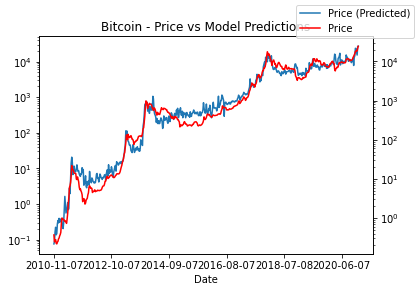

In [269]:
price = final_df['Price']
predicted = final_df['Ridge Price (Predicted)']
residuals = price - predicted

#random indicator stuff 
#RRVIdf = pd.DataFrame()
#RRVIdf['Date'] = df['date'].tolist()
#RRVIdf['RRVI'] = (np.divide(residuals,price))
#RRVIdf.to_csv('RRVI.csv', encoding='utf-8')


#matplotlib
plt.figure(figsize=(20,10))
ax = final_df.plot(x="Date", y="Ridge Price (Predicted)", legend=False, label = "Price (Predicted)")
ax2 = ax.twinx()
ax.set_yscale("log")
final_df.plot(x="Date", y="Price", ax=ax2, legend=False, color="r", title = "Bitcoin - Price vs Model Predictions", label = "Price")
ax.figure.legend()
plt.yscale("log")

final_df.to_csv('Predictions.csv', encoding='utf-8')

<Figure size 1440x720 with 0 Axes>

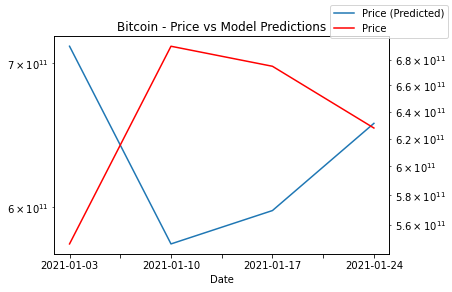

In [270]:
## Out of sample prediction
OOS_df = pd.read_csv("OOS.csv")
X_OOS = OOS_df[['lns2f','lndiff','trend']]
# Add in 3-degree polynomial of the X variables
X_OOS = pd.DataFrame(PolynomialFeatures(degree = 3).fit_transform(X_OOS))

tsupply = OOS_df[['tsupply']]
values = OOS_df[['lnMC']]
OOSlnMCPred = ridge_final.predict(X_OOS)
OOSMCPred = np.exp(OOSlnMCPred)
values = OOS_df[['lnMC']]
OOSRes = values - OOSlnMCPred
MC = np.exp(values)

X_OLS = OOS[['lns2f','lndiff','trend']]
OOS_OLSPred = ols.predict(X_OLS)
OLSMCPred = np.exp(OOS_OLSPred)
OLSResiduals = values - OLSMCPred


OOS_df['Date'] = OOS_df['date'].tolist()
OOS_df['lnMC'] = OOS_df['lnMC']
OOS_df['Market Cap'] = MC
OOS_df['Price'] = np.divide(MC,tsupply)

OOS_df['Ridge lnMC (Predicted)'] = OOSlnMCPred
OOS_df['Ridge Market Cap (Predicted)'] = OOSMCPred
OOS_df['Ridge Price (Predicted)'] = np.divide(OOSMCPred,tsupply)

OOS_df['OLS lnMC Predictions'] = OOS_OLSPred
OOS_df['OLS Price (Predicted)'] = np.divide(OLSMCPred,tsupply)
OOS_df['OLS Market Cap (Predicted)'] = OLSMCPred

OOS_df['Ridge Residuals'] = OOSRes
OOS_df['OLS Residuals'] = OLSResiduals

OOS_df.to_csv('Out of Sample Predictions.csv', encoding='utf-8')

#matplotlib
plt.figure(figsize=(20,10))
ax = OOS_df.plot(x="Date", y='Ridge Market Cap (Predicted)', legend=False, label = "Price (Predicted)")
ax2 = ax.twinx()
ax.set_yscale("log")
OOS_df.plot(x="Date", y='Market Cap', ax=ax2, legend=False, color="r", title = "Bitcoin - Price vs Model Predictions", label = "Price")
ax.figure.legend()
plt.yscale("log")